# NetCDF Veri Görselleştirme

## Veriyi Ortama Yükleme

GFS verisine tekrar ulaşalım.

> Ek olarak: **pip install proplot**

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy
import proplot as plot
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER , LATITUDE_FORMATTER

C:\Users\USER\anaconda3\envs\qe-mini-example\lib\site-packages\proplot\config.py:1454: ProPlotWarning: Rebuilding font cache.


In [5]:
data = xr.open_dataset(r'http://nomads.ncep.noaa.gov:80/dods/gfs_0p25/gfs20201209/gfs_0p25_00z')

## Veriyi Hazırlama
500mb abs. vorticity ve jeop. yükseklik verilerini ayıralım türkiye için ve sadece ilk zaman dilimi olsun.

In [6]:
vort_500 = data['absvprs'].sel(lev = 500,
                               lat = slice(30, 52),
                               lon = slice(20, 52)).isel(time=0) * 1e+5 # unit değiştirdik

height_500 = data['hgtprs'].sel(lev = 500,
                            lat = slice(30, 52),
                            lon = slice(20, 52)).isel(time=0)

Şimdi lat ve lonları tanımlayalım değişkenlerimiz için

In [7]:
lon = vort_500['lon']
lat = vort_500['lat']

## Görselleştir

### Cmap Tanımlama

In [8]:
cmap = plot.Colormap('Blue6', 'Green1_r', 'Orange5',
                     ratios=(50, 20, 30),
                     name='SciVisColor', )

<ipython-input-9-fcc2249a6626>:58: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  colorbar = plt.colorbar(vorticity_mesh,
C:\Users\USER\anaconda3\envs\qe-mini-example\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\USER\anaconda3\envs\qe-mini-example\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


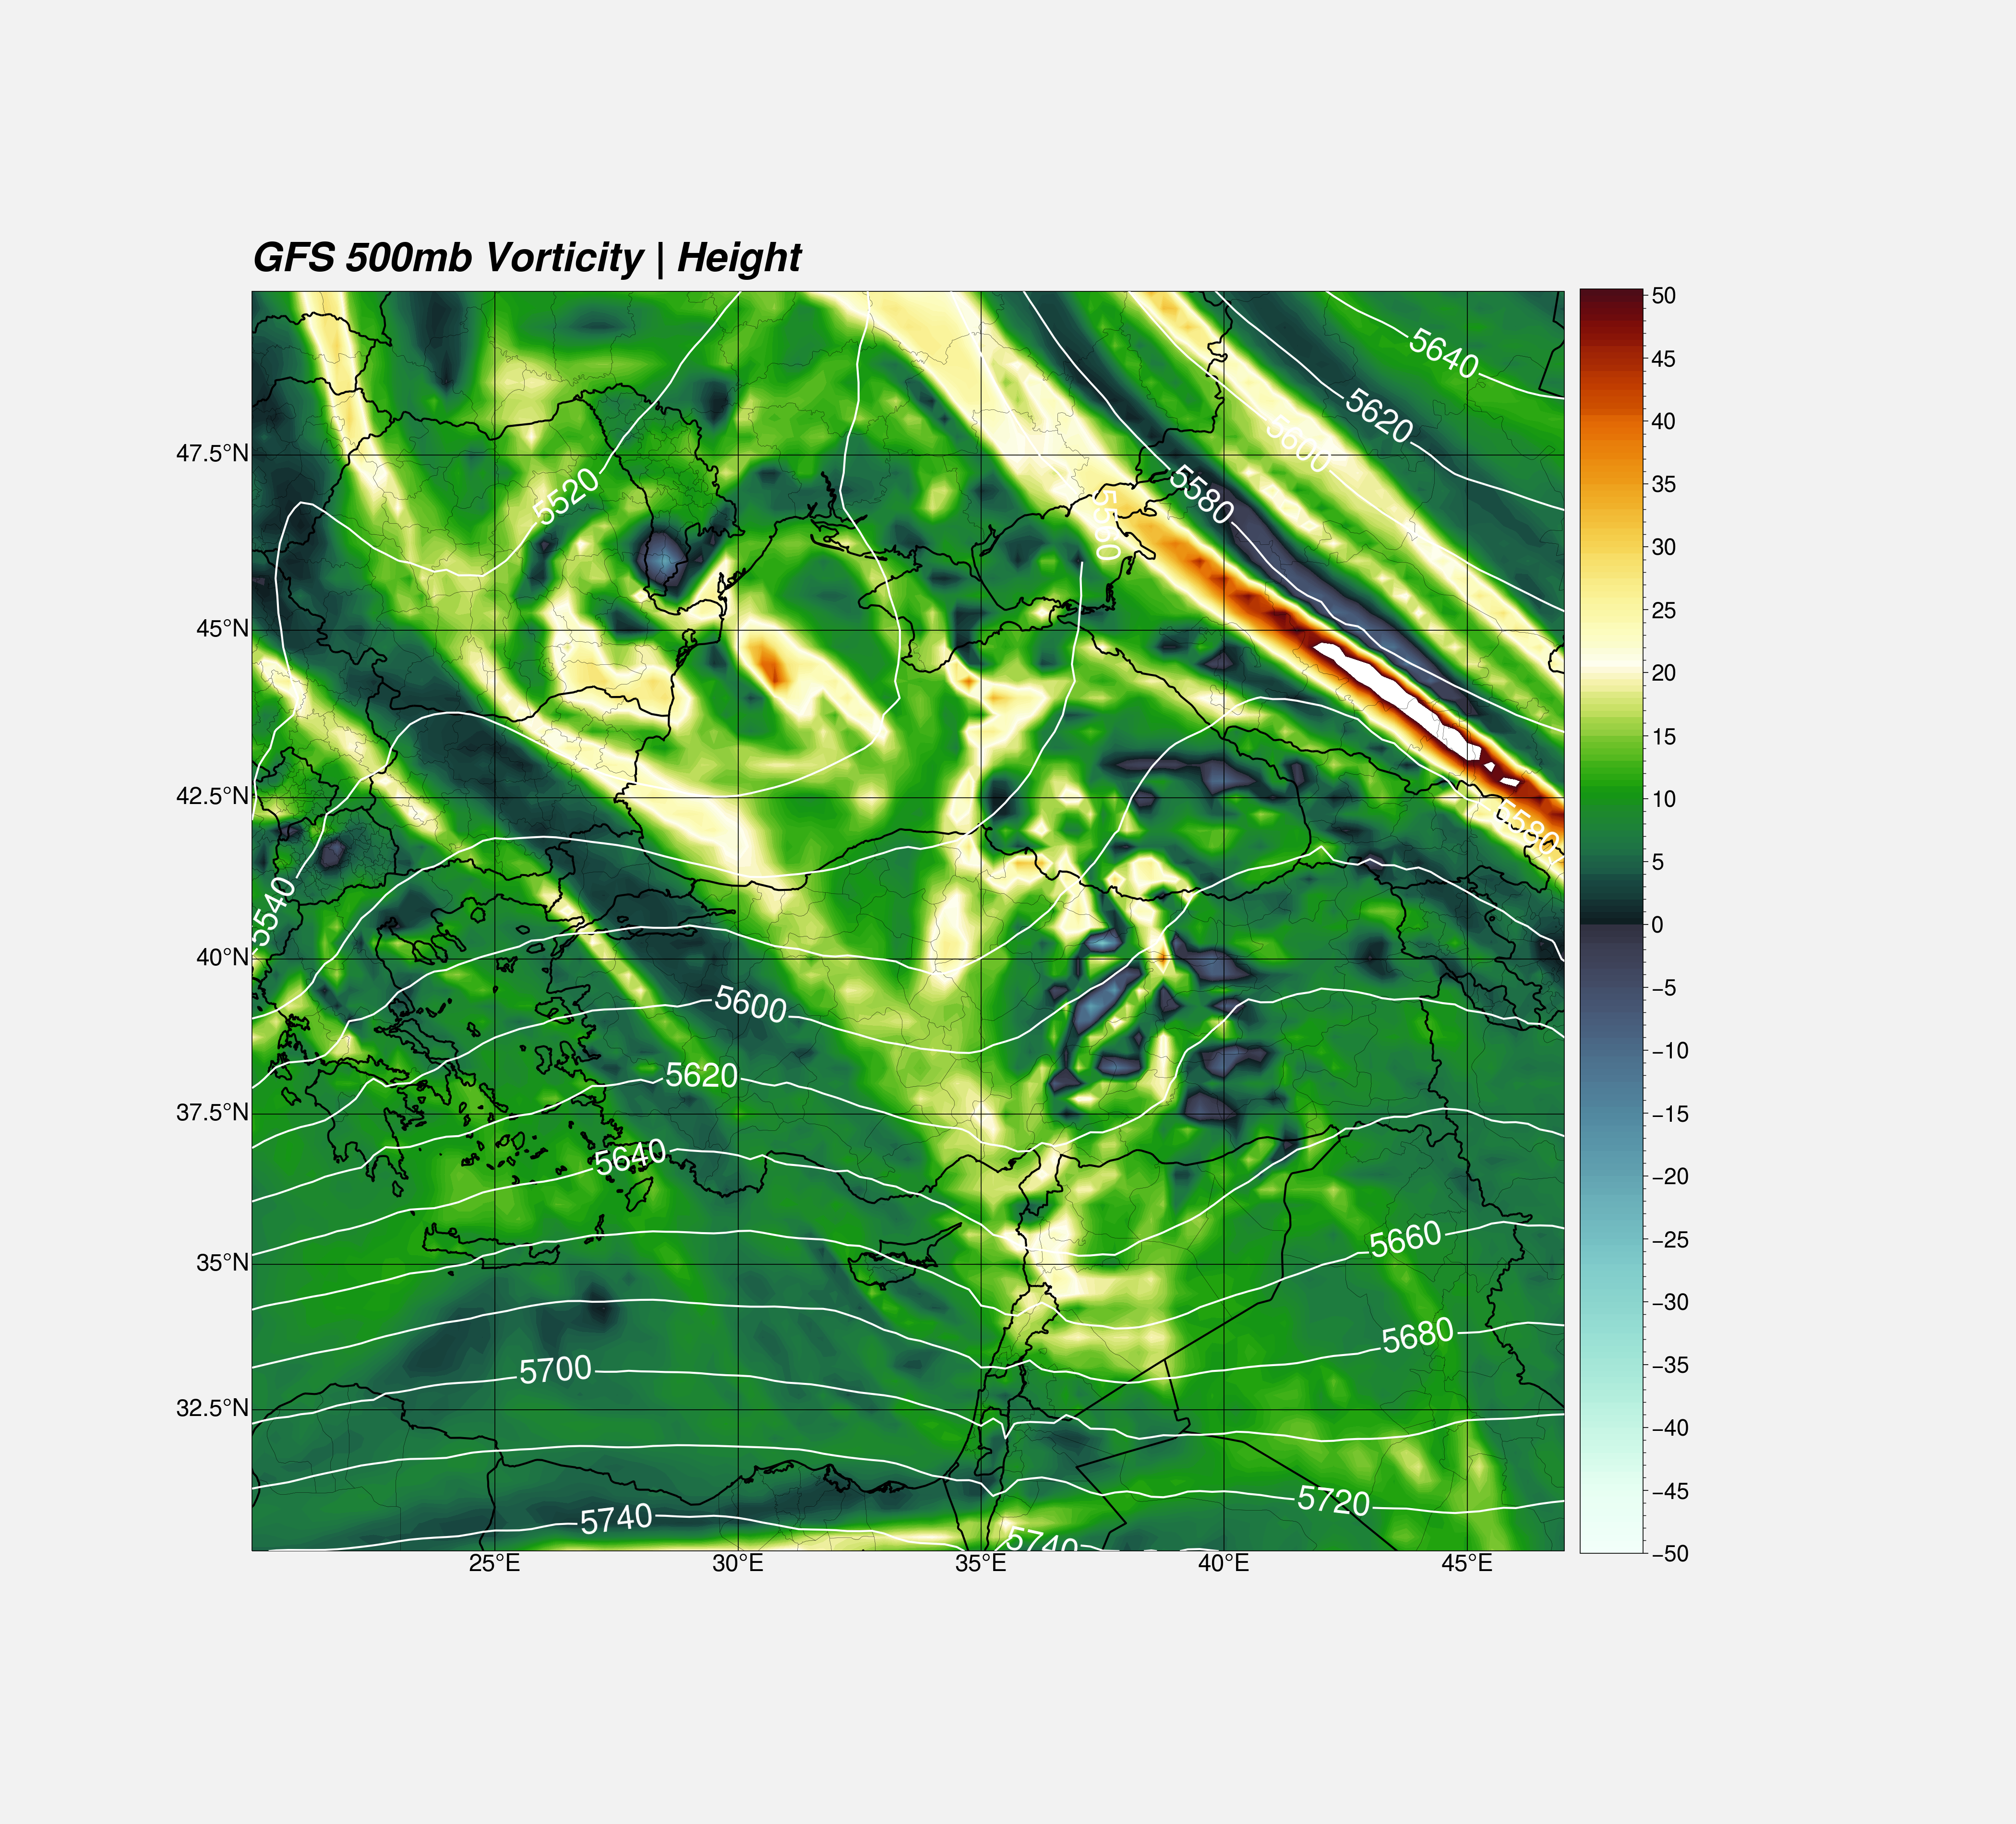

In [9]:
# şimdi aldığımız bu veriler ile 500mb vorticity ve yükseklikleri görselleştirelim

# figür size'i oluşturalım
size = plt.rcParams['figure.figsize'] = 21, 19

# figür oluşturalım
fig = plt.figure()

# figürün içinde axisimizi oluşturalım  (mercator projeksiyonu tanımlıyoruz axisimiz için cartopy ile)
ax = fig.add_subplot(projection = cartopy.crs.Mercator())

# ülke sınırlarını şekillerini tanımlayalım (10 metre resolution ile tanımlıyoruz)
# burada zorder şekilin en üst üste eklenen objelerden kaçıncı sırada görüneceğini belirtiyor
# mesela zorder = 3 tanımlı obje zorder=4 tanımının altında gözükecek (zorder büyüdükçe en üste çıkıyor obje)
borders = ax.add_feature(cartopy.feature.BORDERS.with_scale('10m') , zorder=4, linewidths=1.5, edgecolor='black')

# şimdi coastline'leri tanımlayalım
coastlines = ax.add_feature(cartopy.feature.COASTLINE.with_scale('10m') , zorder=3, linewidths=1.5, edgecolor='black')

# şimdi state'leri ekleyelim
states = ax.add_feature(cartopy.feature.STATES.with_scale('10m'), zorder=4, linewidths=0.1, edgecolor='black')

# şimdi haritamızda extent tanımlayalım yani hangi coğrafi bölgeye yakın planda bakmak istiyoruz
ax.set_extent([20, 47, 30, 49])

# şimdi görselleştireceğimiz intervalı ayarlayalım her iki değişken için
vorticity_interval = np.arange(-50, 51, 0.5)
height_interval = np.arange(4680, 6121, 20)

# şimdi height değişkeni için contourplot oluşturalım (transform hangi projeksiyon ile çizdirceğimizi belirtiyor)
# height_interval ise contourplot'u hangi aralıkla çizdirceğimizi söylüyor (üstte belirledik.)
height_contour = ax.contour(lon, lat, height_500,
                            height_interval,
                            colors = 'white',
                            linewidths = 1.5,
                            linestyles = 'solid',
                            transform = cartopy.crs.PlateCarree(),
                            zorder = 6 )

# buna ek olarak contourplot'umuza labellerimizi ekleyelim
contour_clabel = ax.clabel(height_contour,
                           fontsize = 25,
                           inline = 1,
                           inline_spacing = 7,
                           fmt = '%i',
                           rightside_up = True,
                           use_clabeltext = True ,
                           zorder = 5)

# Şimdi contourplot yanında artık vorticity için mesh'te yapalım yani contourf diye geçiyor matplotlib'de
vorticity_mesh = ax.contourf(lon, lat, vort_500,
                             vorticity_interval,
                             cmap = cmap,
                             zorder=2,
                             transform = cartopy.crs.PlateCarree())

# colorbar oluşturalım
colorbar = plt.colorbar(vorticity_mesh,
                        shrink = 0.90,
                        pad = 0.01,
                        ticks = np.arange(-50, 51, 5),
                        extend = 'max')

# şimdi colorbar labellerimizin boyutlarını düzenleyelim
colorbar.ax.tick_params(labelsize = 17)
             

# haritanın kenarlarına lon ve lat değerlerini ekleyelim
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 18}
gl.ylabel_style = {'size': 18}

# son olarak title oluşturalım
title = ax.text(x = 0, y = 1.016, s = 'GFS 500mb Vorticity | Height',
                weight='heavy',
                style='italic',
                transform=ax.transAxes,
                fontsize = 30)